# ***Extracting features from data***

FMML Module 1, Lab 1<br>


In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=d8a9f19163baf591fdfe7b4e0a25ab4bd90f42845f4501bc66c15020a2fe70d7
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


# Part 1: Features of text

* topic-1 : "Brain"
* topic-2 : "Computer"

In [3]:
topic1 = 'Human Brain'
topic2 = 'Computer'


# es - for Spanish
wikipedia.set_lang('es') 

topic1InSpanish = wikipedia.page(topic1).content

topic2InSpanish = wikipedia.page(topic2).content

# it - for italian
wikipedia.set_lang('it')

topic1InItalian = wikipedia.page(topic1).content
topic2InItalian = wikipedia.page(topic2).content



This is what the text looks like:

In [4]:
topic1InSpanish

'El Proyecto Cerebro Humano (HBP por sus siglas en inglés) es un proyecto médico-científico y tecnológico financiado por la Unión Europea y dirigido por Henry Makram, que tiene como fin reproducir tecnológicamente las características del cerebro humano, y de esta forma conseguir avances en el campo de la medicina y la neurociencia. Para que este proyecto pueda desarrollarse es necesaria la investigación en nuevas TIC, o tecnologías de supercomputación avanzadas que permitan asociar y utilizar la información integrada en modelos informáticos y simulaciones del cerebro que identifiquen patrones, principios organizativos y posibles carencias que puedan ser subsanadas con nuevos experimentos. A su vez para este fin, se han desarrollado distintas plataformas:\n\nPlataforma Neuroinformática: reunirá datos y conocimiento de neurocientíficos de todo el mundo, poniéndolos a disposición de la comunidad científica.\nPlataforma de Simulación del Cerebro: integrará esta información en modelos infor

In [5]:
topic1InItalian

'Lo Human Brain Project (Progetto cervello umano) è un progetto scientifico nel campo dell\'informatica e delle neuroscienze che mira a realizzare, entro il 2023, attraverso un supercomputer, una simulazione del funzionamento completo del cervello umano.\n\n\n== Organizzazione ==\nIl programma scientifico è diretto da un\'équipe svizzera dell\'Scuola politecnica federale di Losanna (ÉPFL), in collaborazione con più di 90 università e scuole di alta formazione di 22 differenti paesi. Direttore del progetto era Henry Markram, ora deposto in seguito allo scandalo della lettera di lamentele firmata da 700 scienziati e colleghi.\nNel gennaio 2013 (insieme al progetto Graphene) è stato selezionato dalla Commissione europea tra i FET Flagships, i progetti faro di ricerca e sviluppo promossi dall\'Unione europea: scelti da una rosa di sei candidati, i due progetti beneficeranno di un sostegno finanziario di 1 miliardo di euro lungo dieci anni.\n\n\n== Motivazioni scientifiche ==\nSi ritiene ch


# **<u> cleanup function to clean the text </u>**

In [6]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters a to z
  return text

In [7]:
topic1InSpanish = cleanup(topic1InSpanish)
topic2InSpanish = cleanup(topic2InSpanish)

topic1InItalian = cleanup(topic1InItalian)
topic2InItalian = cleanup(topic2InItalian)

# After Cleaning the Text

In [8]:
print(topic1InSpanish)

elproyectocerebrohumanohbpporsussiglaseninglsesunproyectomdicocientficoytecnolgicofinanciadoporlaunineuropeaydirigidoporhenrymakramquetienecomofinreproducirtecnolgicamentelascaractersticasdelcerebrohumanoydeestaformaconseguiravancesenelcampodelamedicinaylaneurocienciaparaqueesteproyectopuedadesarrollarseesnecesarialainvestigacinennuevasticotecnologasdesupercomputacinavanzadasquepermitanasociaryutilizarlainformacinintegradaenmodelosinformticosysimulacionesdelcerebroqueidentifiquenpatronesprincipiosorganizativosyposiblescarenciasquepuedansersubsanadasconnuevosexperimentosasuvezparaestefinsehandesarrolladodistintasplataformasplataformaneuroinformticareunirdatosyconocimientodeneurocientficosdetodoelmundoponindolosadisposicindelacomunidadcientficaplataformadesimulacindelcerebrointegrarestainformacinenmodelosinformticosunificadoshaciendoposibleidentificarlosdatosquefaltanypermitiendoexperimentosinsilicoimposiblesderealizarenellaboratorioplataformadecomputacindealtorendimientosuministrarlatec

In [10]:
print(topic1InItalian)

lohumanbrainprojectprogettocervelloumanounprogettoscientificonelcampodellinformaticaedelleneuroscienzechemiraarealizzareentroilattraversounsupercomputerunasimulazionedelfunzionamentocompletodelcervelloumanoorganizzazioneilprogrammascientificodirettodaunquipesvizzeradellscuolapolitecnicafederaledilosannapflincollaborazioneconpidiuniversitescuoledialtaformazionedidifferentipaesidirettoredelprogettoerahenrymarkramoradepostoinseguitoalloscandalodellaletteradilamentelefirmatadascienziatiecolleghinelgennaioinsiemealprogettographenestatoselezionatodallacommissioneeuropeatraifetflagshipsiprogettifarodiricercaesviluppopromossidallunioneeuropeasceltidaunarosadiseicandidatiidueprogettibeneficerannodiunsostegnofinanziariodimiliardodieurolungodieciannimotivazioniscientifichesiritienecheunasimulazionedelcervelloumanopermetteradesempiolosviluppodiunnuovoapproccioallafisiologiaeallapatologiadelsistemanervosoconlapredisposizionediterapieinnovativeepiefficaciperlacuradimalattieneuropsichiatrichecomelalz

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [12]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of Spanish pages and Italian pages.

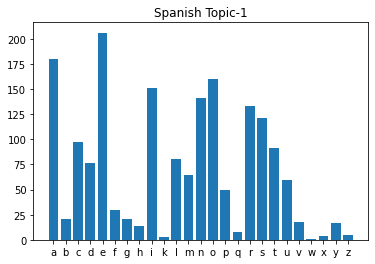

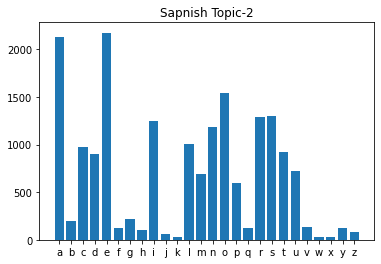

In [13]:
unigramSpanish1 = Counter(ngrams(topic1InSpanish,1))  # return no of time that ngram present in text
plothistogram(unigramSpanish1)
plt.title('Spanish Topic-1')
plt.show()

unigramSpanish2 = Counter(ngrams(topic2InSpanish,1))
plothistogram(unigramSpanish2)
plt.title('Sapnish Topic-2')
plt.show()

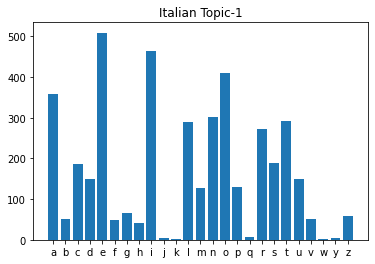

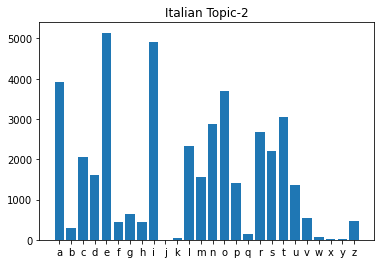

In [14]:
unigramItalian1 = Counter(ngrams(topic1InItalian,1))
plothistogram(unigramItalian1)
plt.title('Italian Topic-1')
plt.show()

unigramItalian2 = Counter(ngrams(topic2InItalian,1))
plothistogram(unigramItalian2)
plt.title('Italian Topic-2')
plt.show()

Here Uni-Grams of **Spanish** and **Italian** looks similar. <br>
So,Uni-grams  may not help us in distinguishing them.

# Let us Try Bi-gram 

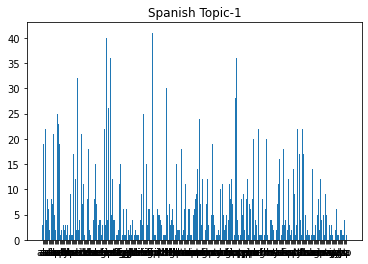

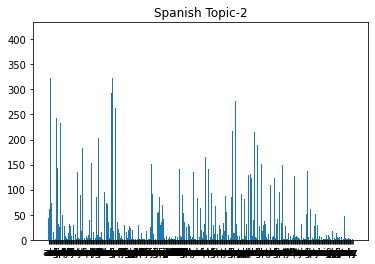

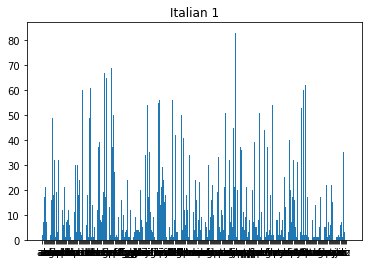

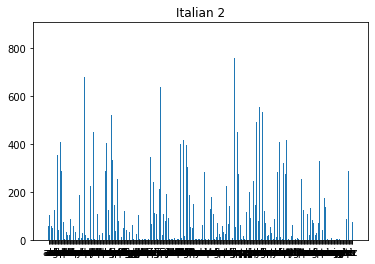

In [15]:
bigramSpanish1 = Counter(ngrams(topic1InSpanish,2)) # bigrams
plothistogram(bigramSpanish1)
plt.title('Spanish Topic-1')
plt.show()

bigramSpanish2 = Counter(ngrams(topic2InSpanish,2))
plothistogram(bigramSpanish2)
plt.title('Spanish Topic-2')
plt.show()

bigramItalian1 = Counter(ngrams(topic1InItalian,2))
plothistogram(bigramItalian1)
plt.title('Italian 1')
plt.show()

bigramItalian2 = Counter(ngrams(topic2InItalian,2))
plothistogram(bigramItalian2)
plt.title('Italian 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [17]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

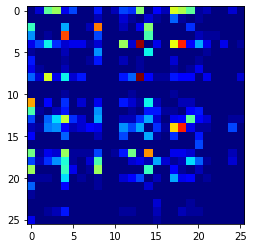

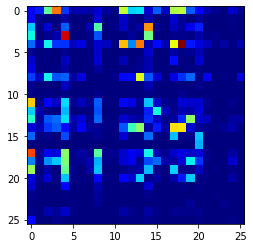

In [18]:
biSpanish1 = plotbihistogram(bigramSpanish1)
plt.show()
biSpanish2 = plotbihistogram(bigramSpanish2)

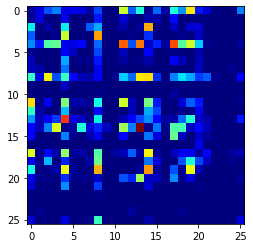

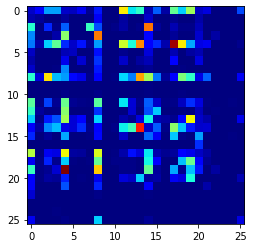

In [19]:
biItalian1 = plotbihistogram(bigramItalian1)
plt.show()
biItalian2 = plotbihistogram(bigramItalian2)

Let us look at the top 10 ngrams for each text. 

In [20]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [21]:
print('\nEnglish 1:')
ShowTopN(biSpanish1)
print('\nEnglish 2:')
ShowTopN(biSpanish2)
print('\nFrench 1:')
ShowTopN(biItalian1)
print('\nFrench 2:')
ShowTopN(biItalian2)


English 1:
('i', 'n') : 41.0
('e', 'n') : 40.0
('e', 's') : 36.0
('o', 's') : 36.0
('d', 'e') : 34.0
('c', 'i') : 32.0
('r', 'o') : 31.0
('l', 'a') : 30.0
('o', 'r') : 28.0
('e', 'r') : 26.0

English 2:
('e', 's') : 413.0
('d', 'e') : 383.0
('r', 'a') : 345.0
('a', 'd') : 323.0
('e', 'n') : 323.0
('c', 'o') : 312.0
('e', 'l') : 293.0
('l', 'a') : 287.0
('o', 'r') : 277.0
('o', 's') : 275.0

French 1:
('o', 'n') : 83.0
('n', 'e') : 71.0
('e', 'r') : 69.0
('e', 'l') : 67.0
('e', 'n') : 65.0
('t', 'o') : 62.0
('d', 'i') : 61.0
('c', 'o') : 60.0
('t', 'i') : 60.0
('i', 'o') : 56.0

French 2:
('t', 'e') : 864.0
('e', 'r') : 840.0
('o', 'n') : 758.0
('c', 'o') : 681.0
('d', 'i') : 674.0
('e', 'n') : 656.0
('i', 'n') : 637.0
('t', 'i') : 600.0
('i', 'c') : 579.0
('a', 'l') : 570.0


Even Bi-grams also looks similar to identfiy difference.

# How can We Visualize tri-grams and n(>3)-grams ?

`For tri-grams:` <br>

we have 26 * 26 * 26 possibilites of ngrams of lenght 3.<br>
Ex: aaa,aab,aac,......,zzy,zzz.<br>
We can visualize it with **3d Graph**


`n(>3)-grams:`<br>
We can't visualize higher dimension.



---



---



# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [22]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_X

In [26]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Extract a subset of the data for our experiment:

In [31]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

In [33]:
no0

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [46]:
print( no1[0].shape ) # it is a 28px length * 28px width

(28, 28)


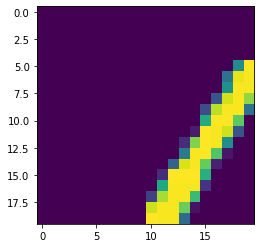

In [44]:
plt.imshow(no1[0,0:20,0:20])

Let us visualize a few images here:

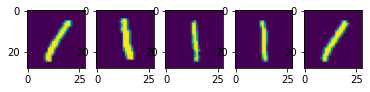

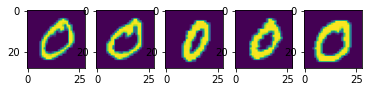

In [47]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [48]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

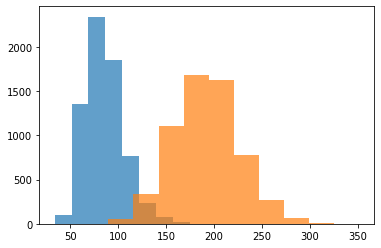

In [49]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [50]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

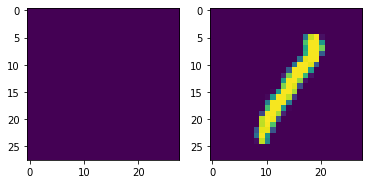

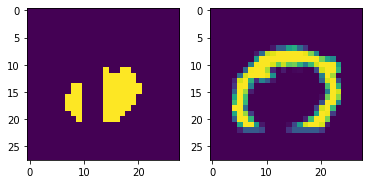

In [51]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

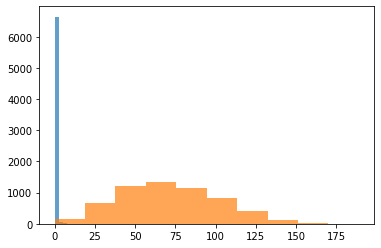

In [52]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [53]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


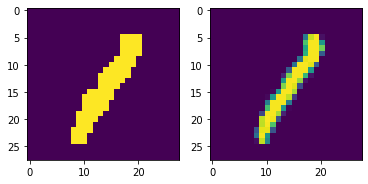

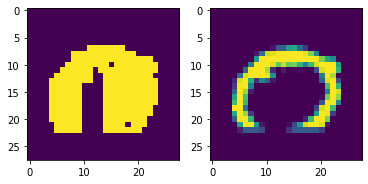

In [54]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

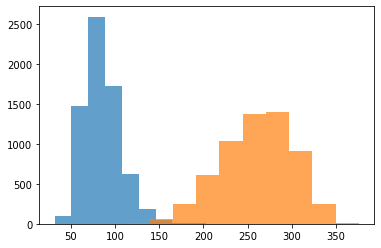

In [55]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [56]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

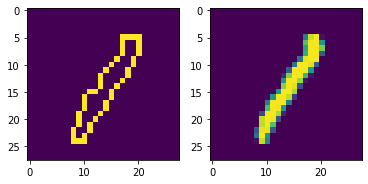

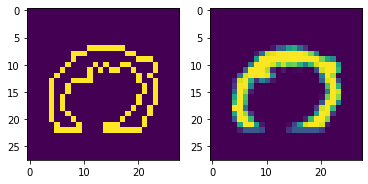

In [57]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

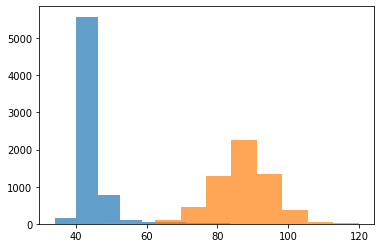

In [58]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

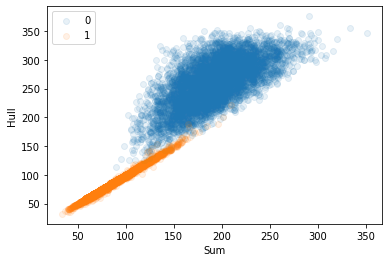

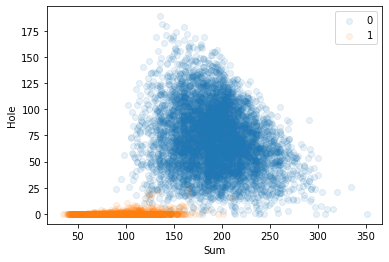

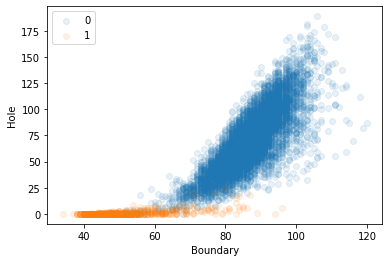

In [59]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [60]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

# 1.Which is the best combination of features? 

Ans : Boundary,sum ,hole 3 features gives  more accuracy.

# 2.How would you test or visualize four or more features?
We can't visualize more than 3rd Dimension but we can test more than 3 features.

# 3.Can you come up with your own features ?
Ans : <br>
* Finding Boundaries of 0 and 1
* IF we found any dark pixels inside the boundary of actual image , then we can say it is 0 or ELSE it is 1.

```
  ---    -|| 
 |xxx|    ||
 |xxx|    ||  
  ---    ---- 

  where x indicates dark pixels which are present inside 0 only.
```


# Will these features work for different classes other than 0 and 1?
Ans : May Not work.Beacues for 1 and 7 their sum of pixels  may close.


# What will happen if we take more that two classes at a time?
These features may or may not work
